In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
np.random.seed(2017)

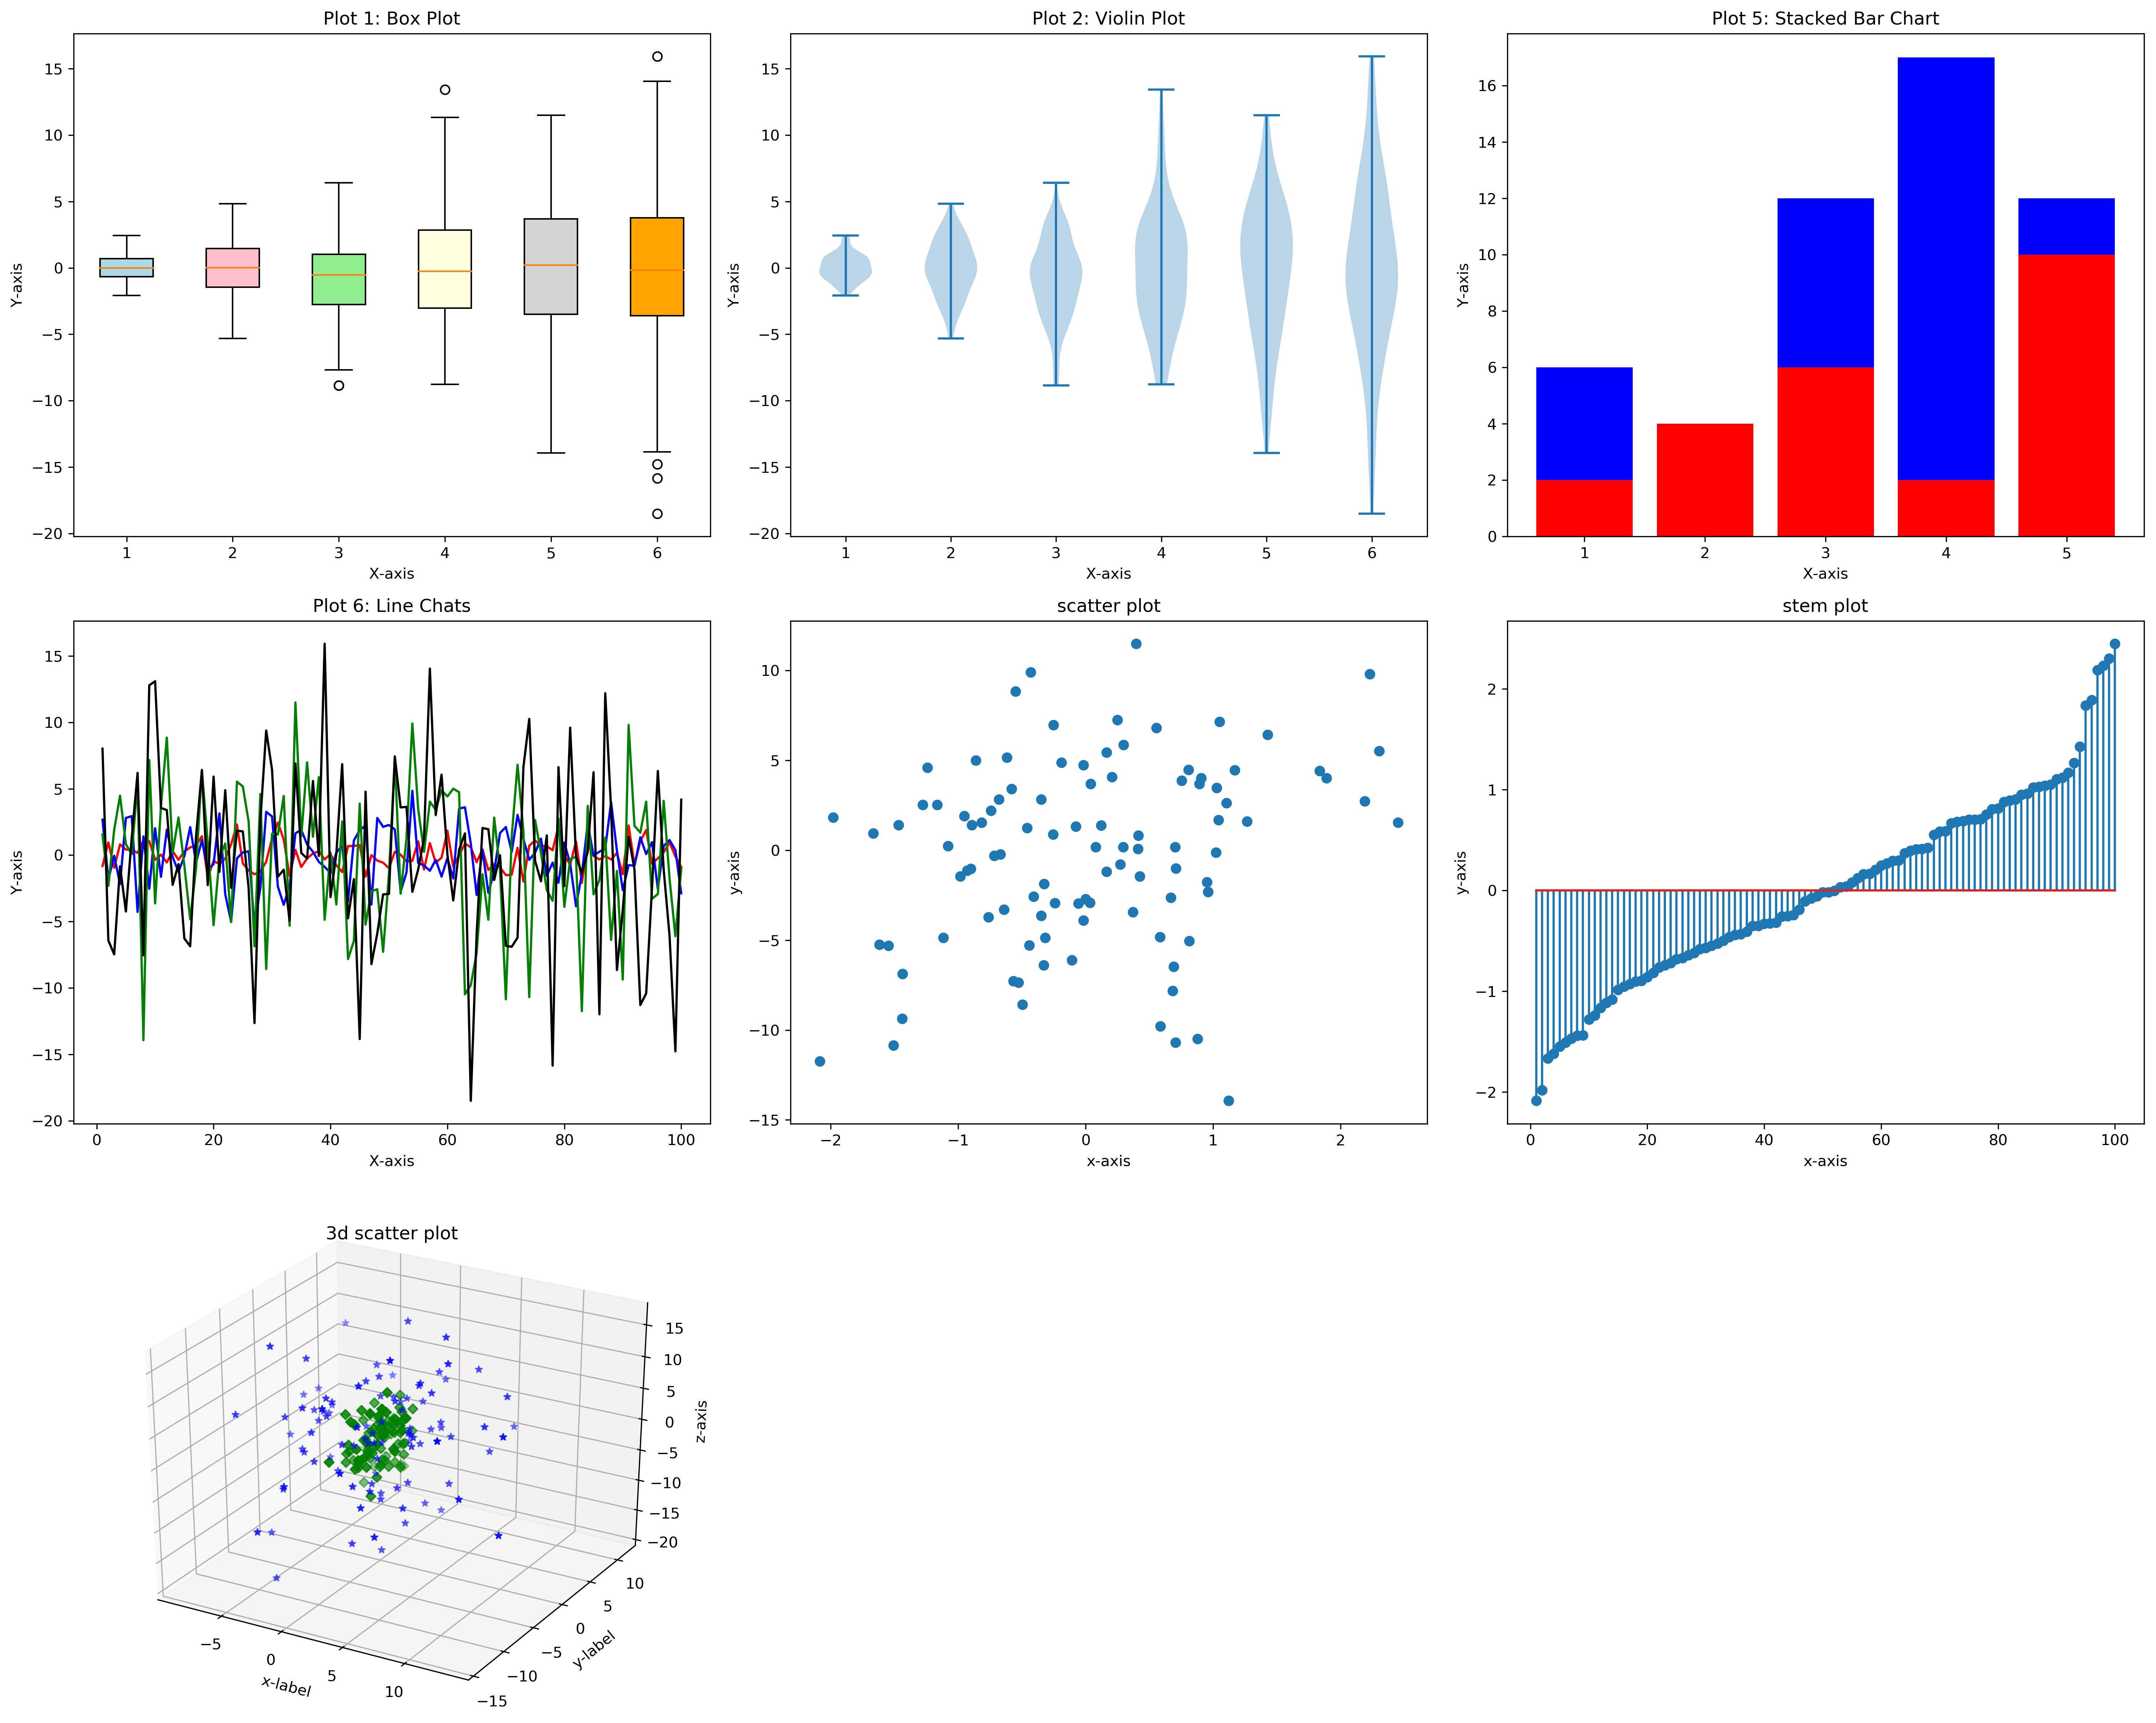

In [41]:
fig = plt.figure(figsize=(20,16), dpi=300)

all_data = [np.random.normal(0, std, 100) for std in range(1, 7)]

ax1 = plt.subplot(3, 3, 1)
ax1.set_title('Plot 1: Box Plot')
ax1.set_ylabel('Y-axis')
ax1.set_xlabel('X-axis')

## Set up boxplot. Filling in the colors is a little convoluted though
boxplot = ax1.boxplot(all_data, patch_artist=True)
colors = ['lightblue', 'pink', 'lightgreen', 
        'lightyellow', 'lightgray', 'orange']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

## Violin Plots (http://matplotlib.org/examples/statistics/customized_violin_demo.html)

ax2 = plt.subplot(3, 3, 2)
ax2.set_title('Plot 2: Violin Plot')
ax2.set_ylabel('Y-axis')
ax2.set_xlabel('X-axis')

violinplot = ax2.violinplot(all_data)

ax5 = plt.subplot(3, 3, 3)
ax5.set_title('Plot 5: Stacked Bar Chart')
ax5.set_ylabel('Y-axis')
ax5.set_xlabel('X-axis')

xs = [x for x in range(1, 6)]
y1 = [2, 4, 6, 2, 10]
y2 = [4, 0, 6, 15, 2]

bottom_bar = ax5.bar(xs, y1, color='red')
top_bar = ax5.bar(xs, y2, bottom=y1, color='blue')

ax6 = plt.subplot(3, 3, 4)
ax6.set_title('Plot 6: Line Chats')
ax6.set_ylabel('Y-axis')
ax6.set_xlabel('X-axis')

xs = [x for x in range(1, 101)]

first_line = ax6.plot(xs, all_data[0], color='red')
second_line = ax6.plot(xs, all_data[1], color='blue')
third_line = ax6.plot(xs, all_data[4], color='green')
fourth_line = ax6.plot(xs, all_data[5], color='black')

ax7 = plt.subplot(3,3,5)
ax7.set_title('scatter plot')
ax7.set_xlabel('x-axis')
ax7.set_ylabel('y-axis')

scatter = ax7.scatter(all_data[0], all_data[4])

ax8 = plt.subplot(3,3,6)
ax8.set_title('stem plot')
ax8.set_xlabel('x-axis')
ax8.set_ylabel('y-axis')

x_data = [x for x in range(1,101)]

stemplot = ax8.stem(x_data, np.sort(all_data[0]))

ax9 = plt.subplot(3,3,7, projection='3d')
ax9.set_title('3d scatter plot')
ax9.set_xlabel('x-label')
ax9.set_ylabel('y-label')
ax9.set_zlabel('z-axis')

scatter_3d1 = ax9.scatter(all_data[0], all_data[1], all_data[2], color='green', marker='D')
scatter_3d2 = ax9.scatter(all_data[3], all_data[4], all_data[5], color='blue', marker='*')

plt.tight_layout()
plt.savefig('chart_types.png')

plt.show()

In [42]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv('datasets/census_data.csv')

In [44]:
df.head()

,age,workclass,education,ednum,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_dummy
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


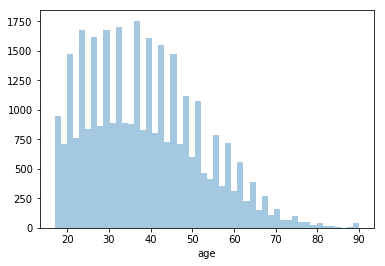

In [47]:
sns.distplot(df['age'], kde=False)

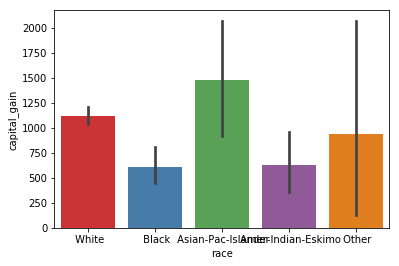

In [52]:
sns.barplot(x='race', y='capital_gain', data=df, palette='Set1')

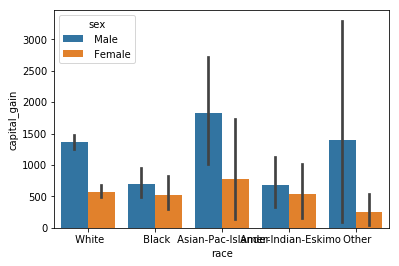

In [53]:
sns.barplot(x='race', y='capital_gain', hue='sex', data=df)

In [55]:
races = df['race'].unique()

In [56]:
races

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [57]:
averages = [df.loc[(df['race'] == race), 'capital_gain'].mean() for race in races]
print(races, averages)

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] [1121.6603753235547, 609.9404609475032, 1478.3580365736284, 625.2668810289389, 934.6605166051661]


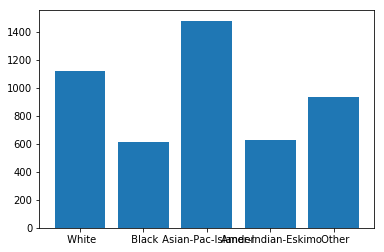

In [58]:
ax = plt.subplot()
ax.bar(range(len(averages)), averages)
ax.set_xticks(range(len(averages)))
ax.set_xticklabels(races)
plt.show()

In [61]:
df['over50k'] = df['income_dummy'].apply(lambda x: 1 if x == ' >50K' else 0)

In [62]:
corr_df = df[['age', 'ednum', 'capital_gain', 'capital_loss', 'hours_per_week', 'over50k']].corr()

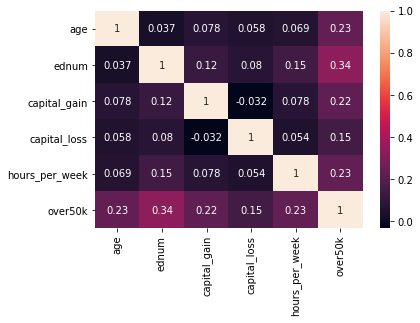

In [66]:
sns.heatmap(corr_df, annot=True)

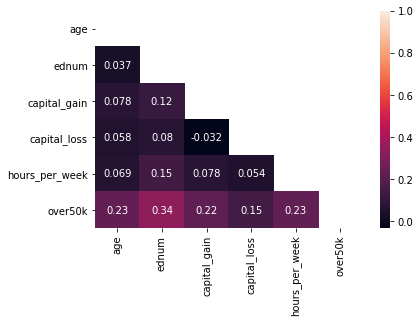

In [68]:
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, annot=True, mask=mask)

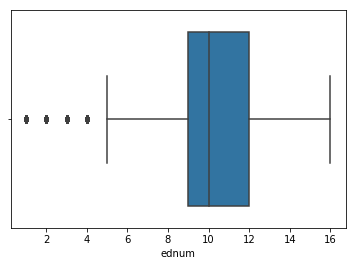

In [69]:
sns.boxplot(df['ednum'])

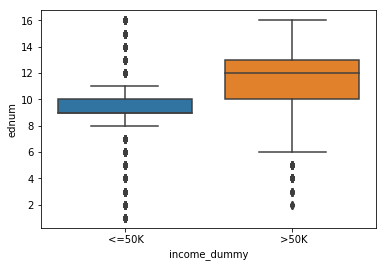

In [70]:
sns.boxplot(x='income_dummy', y='ednum', data=df)

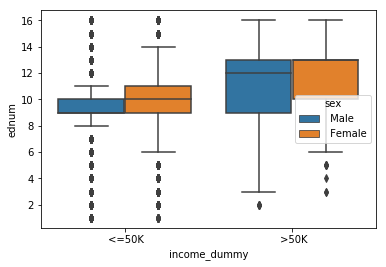

In [71]:
sns.boxplot(x='income_dummy', y='ednum', hue='sex', data=df)

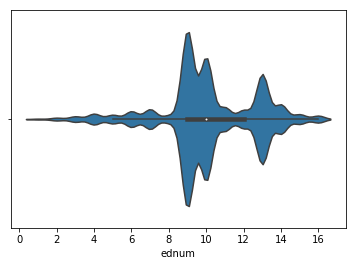

In [72]:
sns.violinplot(df['ednum'])

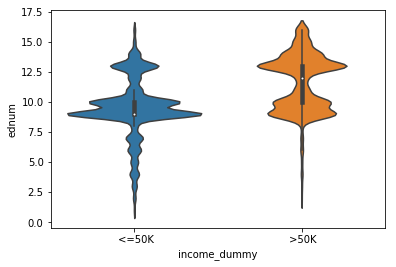

In [73]:
sns.violinplot(x='income_dummy', y='ednum', data=df)

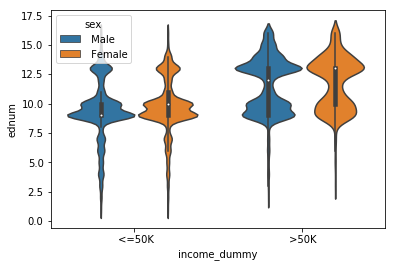

In [74]:
sns.violinplot(x='income_dummy', y='ednum', hue='sex', data=df)

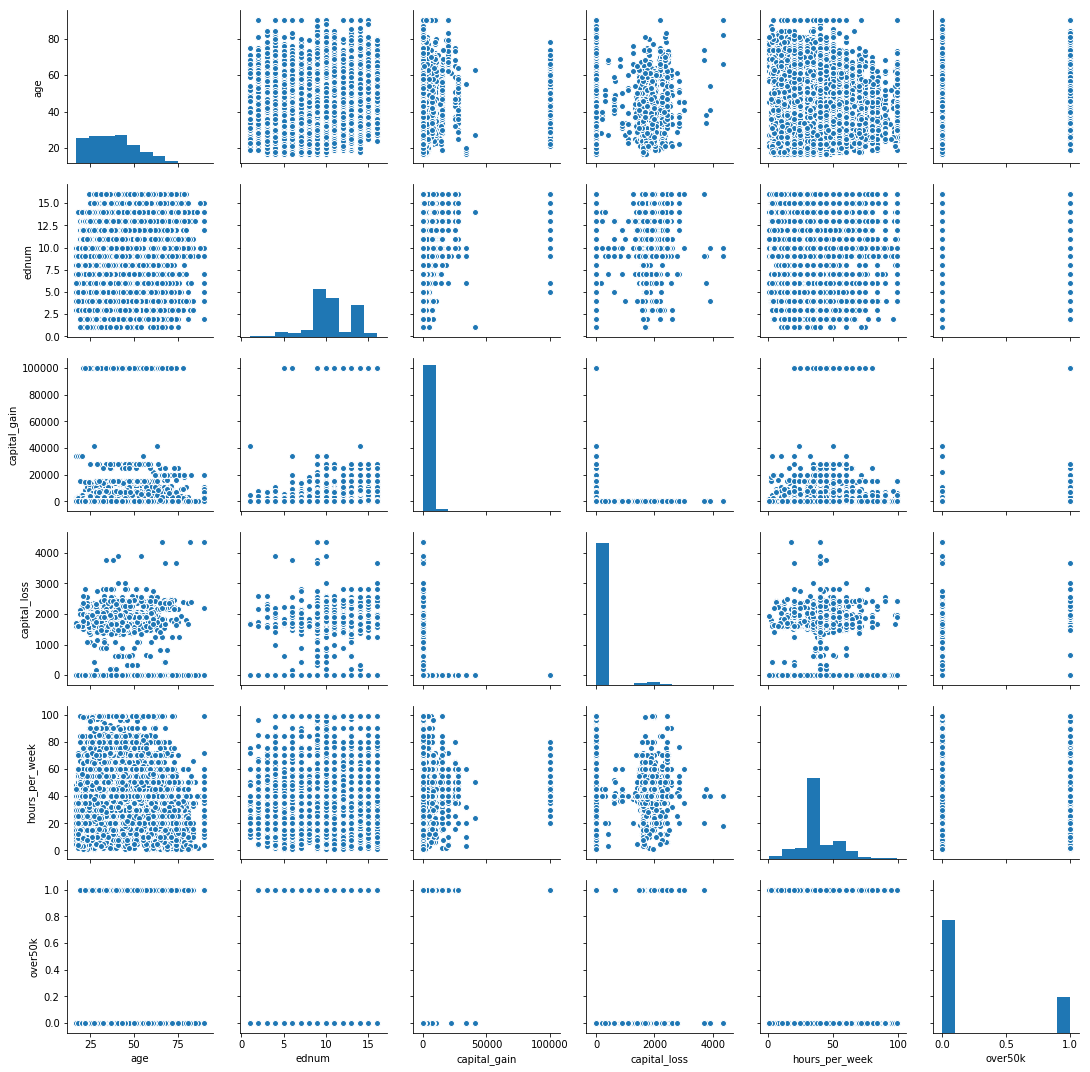

In [78]:
sns.pairplot(df[['age', 'ednum', 'capital_gain', 'capital_loss', 'hours_per_week', 'over50k']], palette='green')

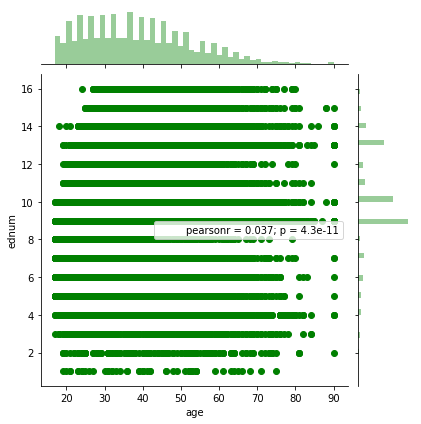

In [80]:
sns.jointplot(x='age', y='ednum', data=df, color='green')

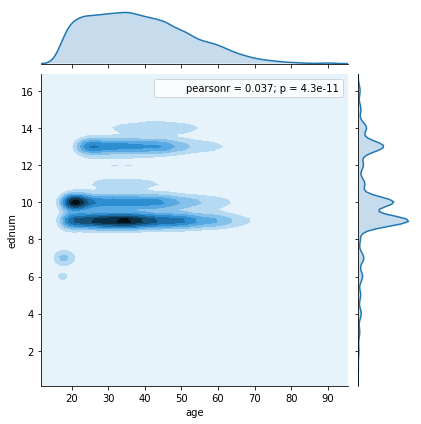

In [81]:
sns.jointplot(x='age', y='ednum', data=df, kind='kde')

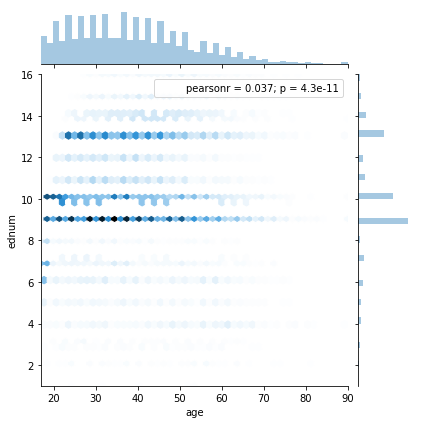

In [82]:
sns.jointplot(x='age', y='ednum', data=df, kind='hex')